<div style="text-align: center; margin: 5px;">
    <h1 style="color: #07004c; font-size: 30px; font-family: Calibri; line-height: 1;">
        <strong> Analyse Approfondie des Prix Immobiliers : </strong>         <br>
        Défis et Solutions en Modélisation Statistique 🏡📈
    </h1>
    <p style="text-align: center; color: #07004c; font-size: 18px; font-family: Calibri;">
        <em> LEPERCQ Louise, NITA Carmen Andreea, SARR Adja, THIOUNE Magatte Niang - M2 SIAD Projet BI / Big Data</em>
    </p>
</div>

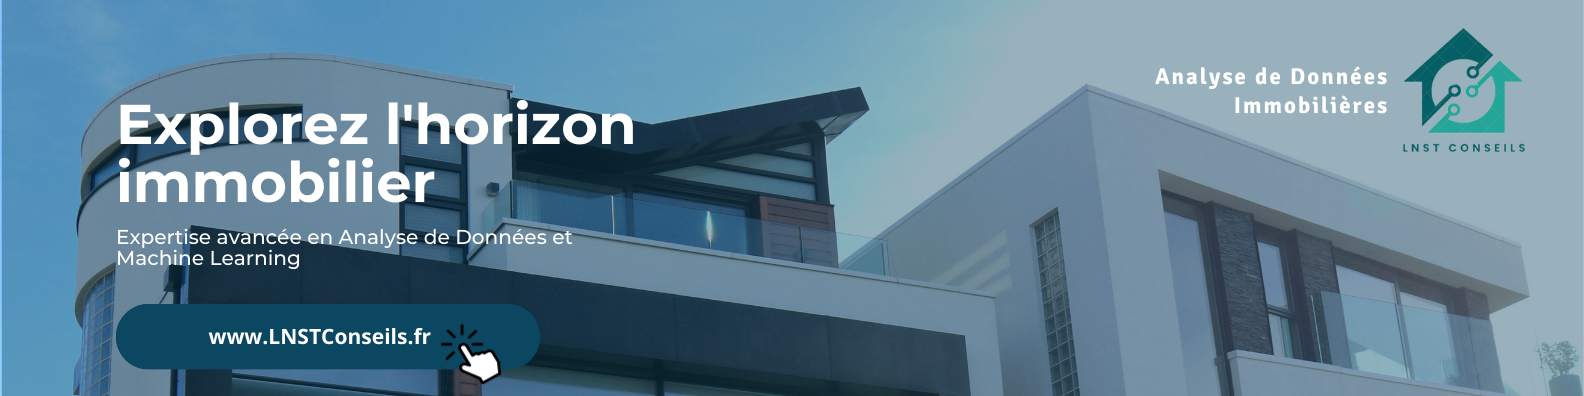

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px; display: inline-block;">
💻 <strong> Compétition Kaggle </strong>

House Prices - Advanced Regression Techniques : Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

</div>

<div style="text-align: center; margin: 5px;">
    <h1 style="color: #07004c; font-size: 30px; font-family: Calibri; line-height: 1;">
        <strong>Etape 1 - Présentation, nettoyage, renommage 🧹📈 </strong>
    </h1>
  
</div>

1. [Introduction](#introduction)
1. [Présentation de la base de données](#pres_bdd)
    1. [Renommage des variables](#renommage)
1. [Conversions de l'unité des variables](#conversions)
1. [Nettoyage de la base de données](#nettoyage)
    1. [Valeurs aberrantes](#daberrantes)
    1. [Valeurs manquantes](#dmanquantes)
1. [Transformations de distributions](#transf_distrib)
1. [Correction du type des variables](#correction_type)
1. [Re-conversions de l'unité des variables](#conversions)


# Partie 1 - Introduction <a class="anchor"  id="introduction"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px; display: inline-block;">

- Depuis plusieurs années, le marché de l’immobilier fluctue. Plusieurs facteurs entrent en jeu, chacun contribuant à l'évolution complexe du **marché immobilier**. Lorsque l’économie progresse, la demande de logements augmente généralement, ce qui peut impacter positivement les prix des logements. Et inversement, une baisse de l'économie peut provoquer une baisse des prix des logements. De plus, un autre facteur qui peut impacter les prix des logements est la localisation des logements. Les prix des logements en métropole seront plus élevés que les prix des logements se situant en pleine campagne. Puis, les caractéristiques du logement seront aussi déterminants pour le prix du logement.
<br><br/>
- Aujourd’hui notre entreprise **LNST Conseils** a été missionnée de réaliser une **analyse prédictive des prix des logements**. Pour cela, nous avons un disposition un fichier dans lequel nous pouvons retrouver des caractéristiques du logement, ainsi que des informations sur la localisation du logement. Ce fichier va nous servir à tester différents modèles de prédiction et une fois affiner, le modèle sera capable de prédire le prix des logements selon leurs caractéristiques.
<br><br/>
- Ce projet est ancré au sein de la **compétition Kaggle "House Prices - Advanced Regression Techniques"**. L'objectif fondamental qui sous-tend cette initiative est d'exploiter des approches avancées en matière de régression, notamment le *feature engineering* et la construction des modèles de prédiction des prix immobiliers d'une grande robustesse.
<br><br/>
- L'**objectif** ultime est de développer un modèle qui puisse offrir des prédictions fiables et précises sur les prix immobiliers. Cette compétition Kaggle offre une opportunité exceptionnelle d'explorer et de mettre en œuvre des techniques de pointe en matière d'apprentissage automatique pour résoudre un défi concret dans le domaine de l'immobilier.

</div>

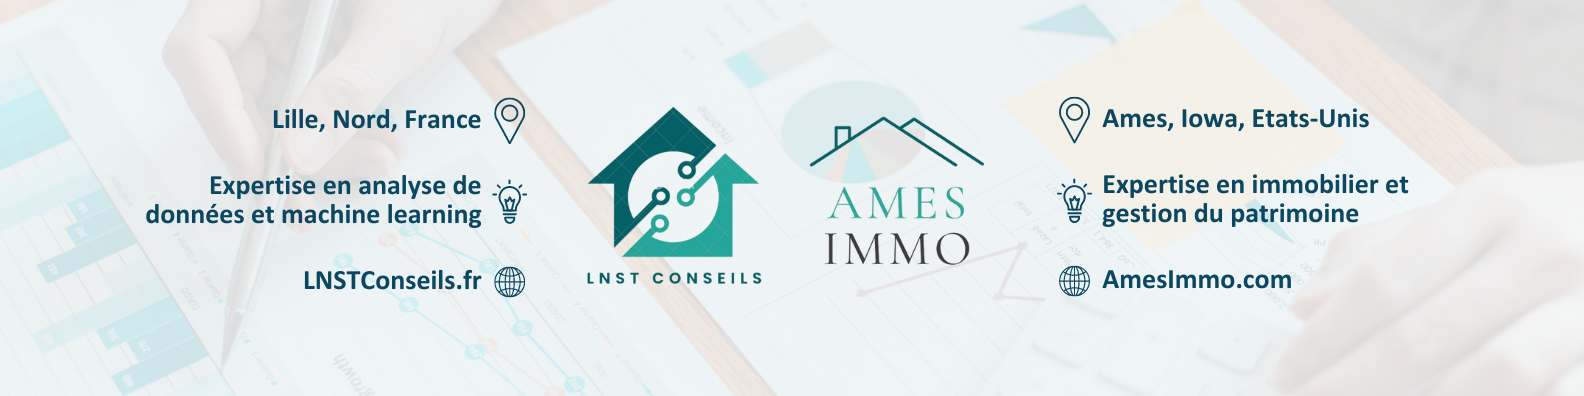

📝 **Comment naviguer dans ce notebook :**

Dans ce notebook, vous pouvez naviguer efficacement en suivant ces étapes simples :

- **Consultez les _définitions statistiques_ (📚) :** Les définitions sont données de manière fonctionnelle pour clarifier les concepts clés utilisés dans l'analyse. Comprendre ces définitions est crucial pour une bonne interprétation des résultats statistiques et pour une application appropriée des techniques d'analyse des données.
<br><br/>
- **Lisez attentivement les _observations_ (💡) :** Ces remarques expliquent les décisions statistiques ou fonctionnelles prises tout au long de l'étude. Elles éclairent sur les raisons pour lesquelles certaines approches ont été privilégiées et guident l'utilisateur dans le processus d'analyse en clarifiant des points spécifiques.
<br><br/>
- **Analysez les _interprétations_ (⚙️) :** Les observations fournissent des interprétations et des réflexions sur les résultats obtenus. Elles permettent de tirer des conclusions significatives et d'identifier des tendances ou des phénomènes intéressants dans les données analysées.


# Partie 2 - Présentation de la base de données <a class="anchor"  id="pres_bdd"></a>
-----------------

<div class="alert alert-block alert-secondary"; style="background-color: #BEDEDF; padding: 10px;">
💡 <strong> Observation </strong>

Cette section concerne l'importation de diverses bibliothèques Python ainsi que l'importation des données.
</div>

In [19]:
# Importations des bibliothèques nécessaires

import pandas as pd # Pour la manipulation des données
import numpy as np # Pour les calculs numériques
from scipy import stats # Pour les fonctions statistiques
from scipy.stats import chi2_contingency # Pour l'analyse de contingence

# Personnaliser les visualisations
## Seaborn et matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
sns.set_style({'axes.grid':False})
## Plotly
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

# Filtrage des avertissements
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) # Ignorer les avertissements de dépréciation
wrn.filterwarnings('ignore', category = FutureWarning) # Ignorer les avertissements futurs
wrn.filterwarnings('ignore', category = UserWarning) # Ignorer les avertissements utilisateur

In [20]:
# Création du dataframe

data_train = pd.read_csv('train.csv', sep = ',')
data_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [21]:
data_train.shape

(1460, 81)

In [22]:
data_test = pd.read_csv('test.csv', sep = ',')
data_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [23]:
data_test.shape

(1459, 80)

In [24]:
merged = pd.concat([data_train, data_test], axis = 0, sort = True)
bold('**Types de données de nos variables :**')
display(merged.dtypes.value_counts())

**Types de données de nos variables :**

object     43
int64      26
float64    12
dtype: int64

In [25]:
merged.shape

(2919, 81)

In [26]:
# Ouverture du fichier en mode lecture
with open('description_donnees.txt', 'r') as f:
    # Lecture du contenu du fichier
    data_desc = f.read()

print(data_desc)

** DESCRIPTION DES DONNEES **

MSSubClass : Identifie le type de logement impliqué dans la vente.

       20	1-ÉTAGE 1946 ET PLUS RÉCENT TOUS STYLES
       30	1-ÉTAGE 1945 ET PLUS ANCIEN
       40	1-ÉTAGE AVEC GRENIER AMÉNAGÉ TOUS ÂGES
       45	1-1/2 ÉTAGE - NON AMÉNAGÉ TOUS ÂGES
       50	1-1/2 ÉTAGE AMÉNAGÉ TOUS ÂGES
       60	2-ÉTAGE 1946 ET PLUS RÉCENT
       70	2-ÉTAGE 1945 ET PLUS ANCIEN
       75	2-1/2 ÉTAGE TOUS ÂGES
       80	SEMI-INDIVIDUEL OU MULTI-NIVEAUX
       85	ENTRÉE DIVISÉE
       90	DUPLEX - TOUS STYLES ET ÂGES
      120	1-ÉTAGE PUD (Développement d'Unité Planifiée) - 1946 ET PLUS RÉCENT
      150	1-1/2 ÉTAGE PUD - TOUS ÂGES
      160	2-ÉTAGE PUD - 1946 ET PLUS RÉCENT
      180	PUD - MULTI-NIVEAUX - INCL SPLIT LEV/FOYER
      190	CONVERSION EN 2 FAMILLES - TOUS STYLES ET ÂGES

MSZoning : Identifie la classification générale de zonage de la vente.

       A	Agriculture
       C	Commercial
       FV	Résidentiel de Village Flottant
       I	Industriel
       RH	Densité

## 2.1 - Renommage des variables <a class="anchor"  id="renommage"></a>

<div class="alert alert-block alert-secondary"; style="background-color: #BEDEDF; padding: 10px;">
💡 <strong> Observation </strong>

Par la suite, pour faciliter les différentes manipulations de la base, nous allons procéder à un renommage de variables.

</div>

In [27]:
correspondance_noms = {
    'Id' : 'id',
    'MSSubClass' : 'typeClasseBatiment',
    'MSZoning' : 'zonage',
    'LotFrontage' : 'longTerrainRue',
    'LotArea' : 'superficieTerrain',
    'Street' : 'typeRouteAcces',
    'Alley' : 'typeAlleeAcces',
    'LotShape' : 'formeTerrain',
    'LandContour' : 'contourTerrain',
    'Utilities' : 'utilites',
    'LotConfig' : 'configTerrain',
    'LandSlope' : 'penteTerrain',
    'Neighborhood' : 'quartier',
    'Condition1' : 'proxRoute1',
    'Condition2' : 'proxRoute2',
    'BldgType' : 'typeBatiment',
    'HouseStyle' : 'styleBatiment',
    'OverallQual' : 'qualiteGlobale',
    'OverallCond' : 'conditionGlobale',
    'YearBuilt' : 'anneeConstruction',
    'YearRemodAdd' : 'anneeRenovation',
    'RoofStyle' : 'styleToit',
    'RoofMatl' : 'materiauToit',
    'Exterior1st' : 'materiauExterieur1',
    'Exterior2nd' : 'materiauExterieur2',
    'MasVnrType' : 'typePlacageMaconnerie',
    'MasVnrArea' : 'superficiePlacageMaconnerie',
    'ExterQual' : 'qualiteExterieur',
    'ExterCond' : 'conditionExterieur',
    'Foundation' : 'fondation',
    'BsmtQual' : 'qualiteSousSol',
    'BsmtCond' : 'conditionSousSol',
    'BsmtExposure' : 'expositionSousSol',
    'BsmtFinType1' : 'qualiteSurfaceFinieSousSol1',
    'BsmtFinSF1' : 'superficieFinieSousSol1',
    'BsmtFinType2' : 'qualiteSurfaceFinieSousSol2',
    'BsmtFinSF2' : 'superficieFinieSousSol2',
    'BsmtUnfSF' : 'superficieSousSolNonAmenagee',
    'TotalBsmtSF' : 'superficieTotaleSousSol',
    'Heating' : 'chauffage',
    'HeatingQC' : 'qualiteChauffage',
    'CentralAir' : 'climatisation',
    'Electrical' : 'systElectrique',
    '1stFlrSF' : 'superficieEtage1',
    '2ndFlrSF' : 'superficieEtage2',
    'LowQualFinSF' : 'superficieQualiteInferieure',
    'GrLivArea' : 'superficieHabitableSaufSs',
    'BsmtFullBath' : 'nbSallesBainSs',
    'BsmtHalfBath' : 'nbDemiSallesBainSs',
    'FullBath' : 'nbSallesBain',
    'HalfBath' : 'nbDemiSallesBain',
    'BedroomAbvGr' : 'nbChambres',
    'KitchenAbvGr' : 'nbCuisines',
    'KitchenQual' : 'qualiteCuisine',
    'TotRmsAbvGrd' : 'nbPieces',
    'Functional' : 'fonctionnalites',
    'Fireplaces' : 'nbCheminees',
    'FireplaceQu' : 'qualiteCheminee',
    'GarageType' : 'typeGarage',
    'GarageYrBlt' : 'anneeConstrGarage',
    'GarageFinish' : 'interieurGarage',
    'GarageCars' : 'nbPlacesVoiture',
    'GarageArea' : 'superficieGarage',
    'GarageQual' : 'qualiteGarage',
    'GarageCond' : 'conditionGarage',
    'PavedDrive' : 'alleePavee',
    'WoodDeckSF' : 'superficieTerrasseBois',
    'OpenPorchSF' : 'superficiePorcheOuvert',
    'EnclosedPorch' : 'superficiePorcheFerme',
    '3SsnPorch' : 'superficieRallonge3Saisons',
    'ScreenPorch' : 'superficieSolarium',
    'PoolArea' : 'superficiePiscine',
    'PoolQC' : 'qualitePiscine',
    'Fence' : 'cloture',
    'MiscFeature' : 'elementsDivers',
    'MiscVal' : 'valeursElementsDivers',
    'MoSold' : 'moisVente',
    'YrSold' : 'anneeVente',
    'SaleType' : 'typeVente',
    'SaleCondition' : 'conditionVente',
    'SalePrice'  : 'prix'
}

merged = merged.copy().rename(columns=correspondance_noms)
merged.head()

superficieEtage1  superficieEtage2  superficieRallonge3Saisons  \
0               856               854                           0   
1              1262                 0                           0   
2               920               866                           0   
3               961               756                           0   
4              1145              1053                           0   

  typeAlleeAcces  nbChambres typeBatiment conditionSousSol expositionSousSol  \
0            NaN           3         1Fam               TA                No   
1            NaN           3         1Fam               TA                Gd   
2            NaN           3         1Fam               TA                Mn   
3            NaN           3         1Fam               Gd                No   
4            NaN           4         1Fam               TA                Av   

   superficieFinieSousSol1  superficieFinieSousSol2  ... typeVente  \
0                    706.0                      0.0  ...        WD   
1                    978.0                      0.0  ...        WD   
2                    486.0                      0.0  ...        WD   
3                    216.0                      0.0  ...        WD   
4                    655.0                      0.0  ...        WD   

  superficieSolarium  typeRouteAcces  nbPieces superficieTotaleSousSol  \
0                  0            Pave         8                   856.0   
1                  0            Pave         6                  1262.0   
2                  0            Pave         6                   920.0   
3                  0            Pave         7                   756.0   
4                  0            Pave         9                  1145.0   

   utilites superficieTerrasseBois anneeConstruction anneeRenovation  \
0    AllPub                      0              2003            2003   
1    AllPub                    298              1976            1976   
2    AllPub                      0              2001            2002   
3    AllPub                      0              1915            1970   
4    AllPub                    192              2000            2000   

  anneeVente  
0       2008  
1       2007  
2       2008  
3       2006  
4       2008  

[5 rows x 81 columns]

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
💡 <strong> Observation </strong>

Nous allons travailler avec la base de données 'train'. Nous utiliserons la base 'test' pour les prédictions.

</div>

In [28]:
# Calcul du nombre de lignes du jeu de données
print("Nombre de lignes :", len(merged.index))

# Calcul du nombre de colonnes du jeu de données
print("Nombre de colonnes :", len(merged.columns))

Nombre de lignes : 2919
Nombre de colonnes : 81


In [29]:
# Extraire les variables numériques
num_merged = merged.select_dtypes(include=['int64', 'float64'])
bold('**Variables numériques :**')
display(num_merged.head(3))
bold('**Nom des variables numériques :**')
display(num_merged.columns.values)

**Variables numériques :**

superficieEtage1  superficieEtage2  superficieRallonge3Saisons  nbChambres  \
0               856               854                           0           3   
1              1262                 0                           0           3   
2               920               866                           0           3   

   superficieFinieSousSol1  superficieFinieSousSol2  nbSallesBainSs  \
0                    706.0                      0.0             1.0   
1                    978.0                      0.0             0.0   
2                    486.0                      0.0             1.0   

   nbDemiSallesBainSs  superficieSousSolNonAmenagee  superficiePorcheFerme  \
0                 0.0                         150.0                      0   
1                 1.0                         284.0                      0   
2                 0.0                         434.0                      0   

   ...  qualiteGlobale  superficiePiscine      prix  superficieSolarium  \
0  ...               7                  0  208500.0                   0   
1  ...               6                  0  181500.0                   0   
2  ...               7                  0  223500.0                   0   

   nbPieces  superficieTotaleSousSol  superficieTerrasseBois  \
0         8                    856.0                       0   
1         6                   1262.0                     298   
2         6                    920.0                       0   

   anneeConstruction  anneeRenovation  anneeVente  
0               2003             2003        2008  
1               1976             1976        2007  
2               2001             2002        2008  

[3 rows x 38 columns]

**Nom des variables numériques :**

array(['superficieEtage1', 'superficieEtage2',
       'superficieRallonge3Saisons', 'nbChambres',
       'superficieFinieSousSol1', 'superficieFinieSousSol2',
       'nbSallesBainSs', 'nbDemiSallesBainSs',
       'superficieSousSolNonAmenagee', 'superficiePorcheFerme',
       'nbCheminees', 'nbSallesBain', 'superficieGarage',
       'nbPlacesVoiture', 'anneeConstrGarage',
       'superficieHabitableSaufSs', 'nbDemiSallesBain', 'id',
       'nbCuisines', 'superficieTerrain', 'longTerrainRue',
       'superficieQualiteInferieure', 'typeClasseBatiment',
       'superficiePlacageMaconnerie', 'valeursElementsDivers',
       'moisVente', 'superficiePorcheOuvert', 'conditionGlobale',
       'qualiteGlobale', 'superficiePiscine', 'prix',
       'superficieSolarium', 'nbPieces', 'superficieTotaleSousSol',
       'superficieTerrasseBois', 'anneeConstruction', 'anneeRenovation',
       'anneeVente'], dtype=object)

In [30]:
# Tracer l'histogramme des variables numériques
fig, axes = plt.subplots(nrows=19, ncols=2, figsize=(40, 200))
for ax, column in zip(axes.flatten(), num_merged.columns):
    sns.distplot(num_merged[column].dropna(), ax=ax, color='#075F65')
    ax.set_title(column, fontsize=43)
    ax.tick_params(axis='both', which='major', labelsize=35)
    ax.tick_params(axis='both', which='minor', labelsize=35)
    ax.set_xlabel('')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
⚙️ <strong> Interprétation </strong>

Nous avons donc à notre disposition un fichier contenant au total 1460 observations décrites autour de 81 variables
</div>

# Partie 3 - Conversions de l'unité des variables <a class="anchor"  id="conversions"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
💡 <strong> Observation </strong>

Les variables exprimées en pieds carrés sont converties en mètres carrés, celles exprimées en pieds sont converties en mètres, et le prix, exprimé en dollars, est converti en euros.

</div>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

Un pied carré équivaut à 0.09290304 mètres carrés.

</div>

In [31]:
'''
# Test pour une variable

def pieds_carres_en_metres_carres(pieds_carres):
    return pieds_carres * 0.092903

# Application de la fonction de conversion à la colonne 'pieds_carres' de votre DataFrame
df2['metres_carres'] = df2['superficieTerrasseBois'].apply(pieds_carres_en_metres_carres)

# Affichage du DataFrame avec la nouvelle colonne 'metres_carres'
df2.head()
'''

# Définition de la fonction de conversion
def ft2_to_m2(ft2):
    return ft2 * 0.09290304

# Liste des variables à convertir
variables_a_convertir = [
    "superficieTerrain",
    "superficieTotaleSousSol",
    "superficieHabitableSaufSs",
    "superficieGarage",
    "superficieTerrasseBois",
    "superficiePorcheOuvert"
]

# Conversion pour chaque variable
for variable in variables_a_convertir:
    merged[variable] = ft2_to_m2(merged[variable])

# Affichage des données modifiées
merged[["superficieTerrain",
    "superficieTotaleSousSol",
    "superficieHabitableSaufSs",
    "superficieGarage",
    "superficieTerrasseBois",
    "superficiePorcheOuvert"]].head()

superficieTerrain  superficieTotaleSousSol  superficieHabitableSaufSs  \
0         785.030688                79.525002                 158.864198   
1         891.869184               117.243636                 117.243636   
2        1045.159200                85.470797                 165.924829   
3         887.224032                70.234698                 159.514520   
4        1324.797350               106.373981                 204.200882   

   superficieGarage  superficieTerrasseBois  superficiePorcheOuvert  
0         50.910866                0.000000                5.667085  
1         42.735398               27.685106                0.000000  
2         56.485048                0.000000                3.901928  
3         59.643752                0.000000                3.251606  
4         77.666941               17.837384                7.803855

In [ ]:
merged[["superficieTerrain",
    "superficieTotaleSousSol",
    "superficieHabitableSaufSs",
    "superficieGarage",
    "superficieTerrasseBois",
    "superficiePorcheOuvert"]].dtypes

superficieTerrain            float64
superficieTotaleSousSol      float64
superficieHabitableSaufSs    float64
superficieGarage             float64
superficieTerrasseBois       float64
superficiePorcheOuvert       float64
dtype: object

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

Un pied  équivaut à 0,3048 mètres.

</div>

In [ ]:
# Définition de la fonction de conversion
def ft_to_m(ft):
    return ft * 0.3048

# Liste des variables à convertir
variable_a_convertir = [
    "longTerrainRue"
]

# Conversion pour chaque variable
for variable in variable_a_convertir:
    merged[variable] = ft_to_m(merged[variable])

# Affichage des données modifiées
merged["longTerrainRue"].head()

0    19.8120
1    24.3840
2    20.7264
3    18.2880
4    25.6032
Name: longTerrainRue, dtype: float64

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

Un dollar est équivalent à 0,91784064 euro (au 15 mars 2024).
</div>

In [ ]:
# Définition de la fonction de conversion
def dollar_en_euro(dollars):
    return dollars * 0.91784064 # date de conversion : 15-03-2024

# Liste des variables à convertir
variable_a_convertir = [
    "prix"
]

# Conversion pour chaque variable
for variable in variable_a_convertir:
    merged[variable] = dollar_en_euro(merged[variable])

# Affichage des données modifiées
merged["prix"].head()

0    191369.77344
1    166588.07616
2    205137.38304
3    128497.68960
4    229460.16000
Name: prix, dtype: float64

In [ ]:
'''# Extraire les données d'entraînement et de test à partir de l'ensemble de données combiné
df_train = merged.iloc[:1460, :].drop(columns=['id'], axis=1)
df_test = merged.iloc[1460:, :].drop(columns=['id', 'prix'], axis=1)'''

"# Extraire les données d'entraînement et de test à partir de l'ensemble de données combiné\ndf_train = merged.iloc[:1460, :].drop(columns=['id'], axis=1)\ndf_test = merged.iloc[1460:, :].drop(columns=['id', 'prix'], axis=1)"

In [ ]:
# Extraire les données d'entraînement et de test à partir de l'ensemble de données combiné
df_train = merged.iloc[:1460, :] #.drop(columns=['id'], axis=1)
df_test = merged.iloc[1460:, :] #.drop(columns=['id', 'prix'], axis=1)

In [ ]:
# Dimensions des données d'entraînement et de test
bold("**Forme de nos données d'entraînement et de test :**")
display(df_train.shape, df_test.shape)

**Forme de nos données d'entraînement et de test :**

(1460, 81)

(1459, 81)

In [ ]:
df_train.to_csv('df_train.csv', index = False)

In [ ]:
df_test.to_csv('df_test.csv', index = False)

In [ ]:
merged.to_csv('merged.csv', index = False)

# Partie 4 - Nettoyage de la base de données <a class="anchor"  id="nettoyage"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
💡 <strong> Observation </strong>

Nous allons améliorer la qualité des données en commençant par vérifier s'il y'a présence de données manquantes ou incohérentes, puis en nous assurant que le type de données des variables est correct.

</div>

## 4.1 - Traitement des données aberrantes <a class="anchor"  id="daberrantes"></a>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px; display: inline-block;">
📚 <strong> Définition </strong>

Les **boxplot** sont un moyen efficace pour identifier les données aberrantes car elles permettent de visualiser rapidement la répartition des données et de repérer les points qui s'écartent significativement de la norme.

Une **valeur aberrante** est généralement définie comme un point de données qui se situe:
* Au-delà de 1,5 fois **l'écart interquartile (IQR)** de la limite supérieure ou inférieure de la boîte,
* À plus de 3 fois l'écart-type de la moyenne.

Il est important de noter que la définition d'une valeur aberrante peut varier en fonction du contexte et de l'objectif de l'analyse. Dans notre cas, cela concerne la prédiction des prix des logements sur le marché.

Voici une représentation graphique illustrant le principe de la boite à moustache (boxplot).    
</div>

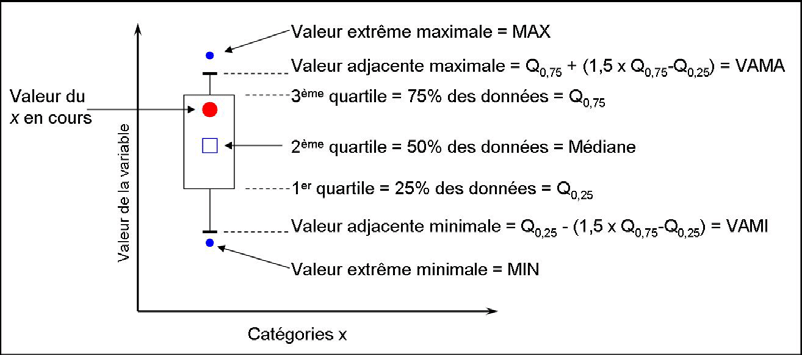

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

Le code ci-dessous nous permet de visualiser sous forme de graphique boxplot les distributions de toutes nos variables numériques. Pour certaines variables plus intéressantes, nous allons regarder de plus prés leur distribution en relation avec la variable cible.

Étant donné que nous ne voulons pas perdre de lignes de la base de données de test, qui doit comporter 1459 lignes à la fin pour la soumission sur la plateforme Kaggle, nous allons supprimer les valeurs aberrantes uniquement de la base de données d'entraînement.
</div>

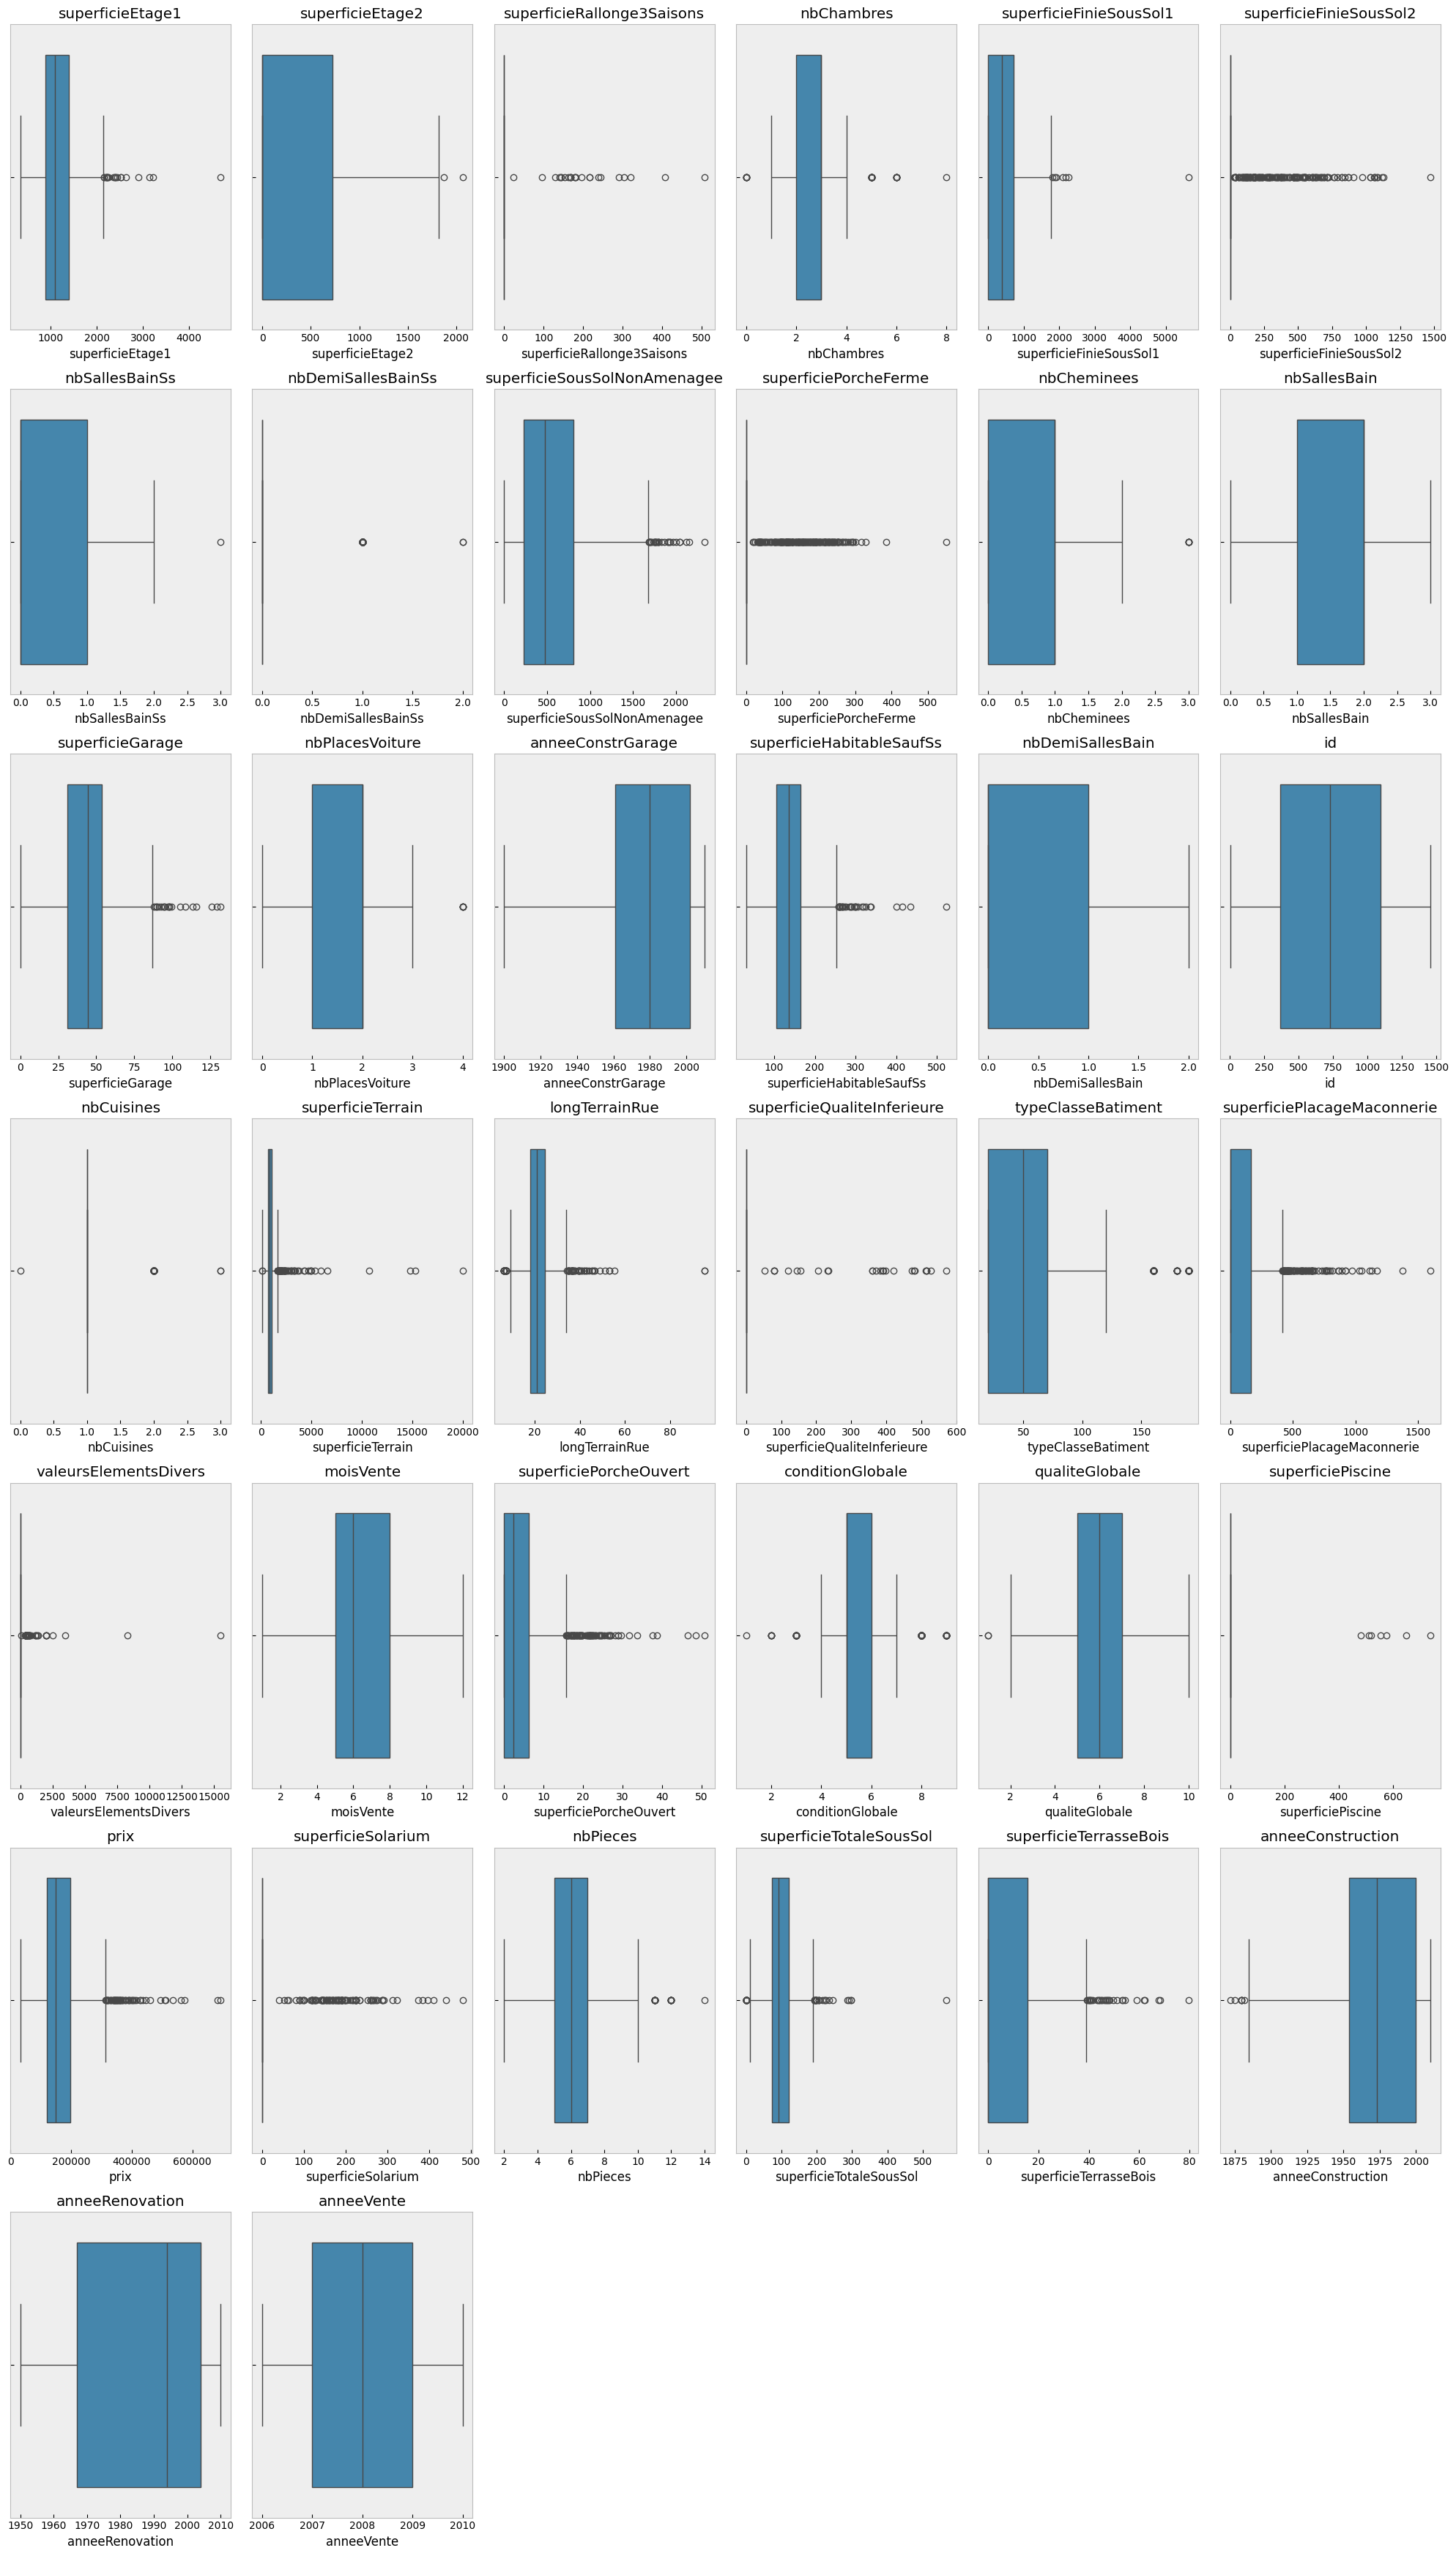

In [ ]:
%matplotlib inline

colonnes_num = df_train.select_dtypes(exclude='object').columns
num_columns_count = len(colonnes_num)
num_columns_per_row = 6

num_rows = (num_columns_count + num_columns_per_row - 1) // num_columns_per_row
fig, axes = plt.subplots(num_rows, num_columns_per_row, figsize=(20, 5*num_rows))

for idx, column in enumerate(colonnes_num):
    row_idx = idx // num_columns_per_row
    col_idx = idx % num_columns_per_row

    sns.boxplot(x=df_train[column], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'{column}')

for i in range(num_rows * num_columns_per_row, num_rows * num_columns_per_row - (num_rows * num_columns_per_row - num_columns_count), -1):
    fig.delaxes(axes.flatten()[i-1])

plt.tight_layout()
plt.show()

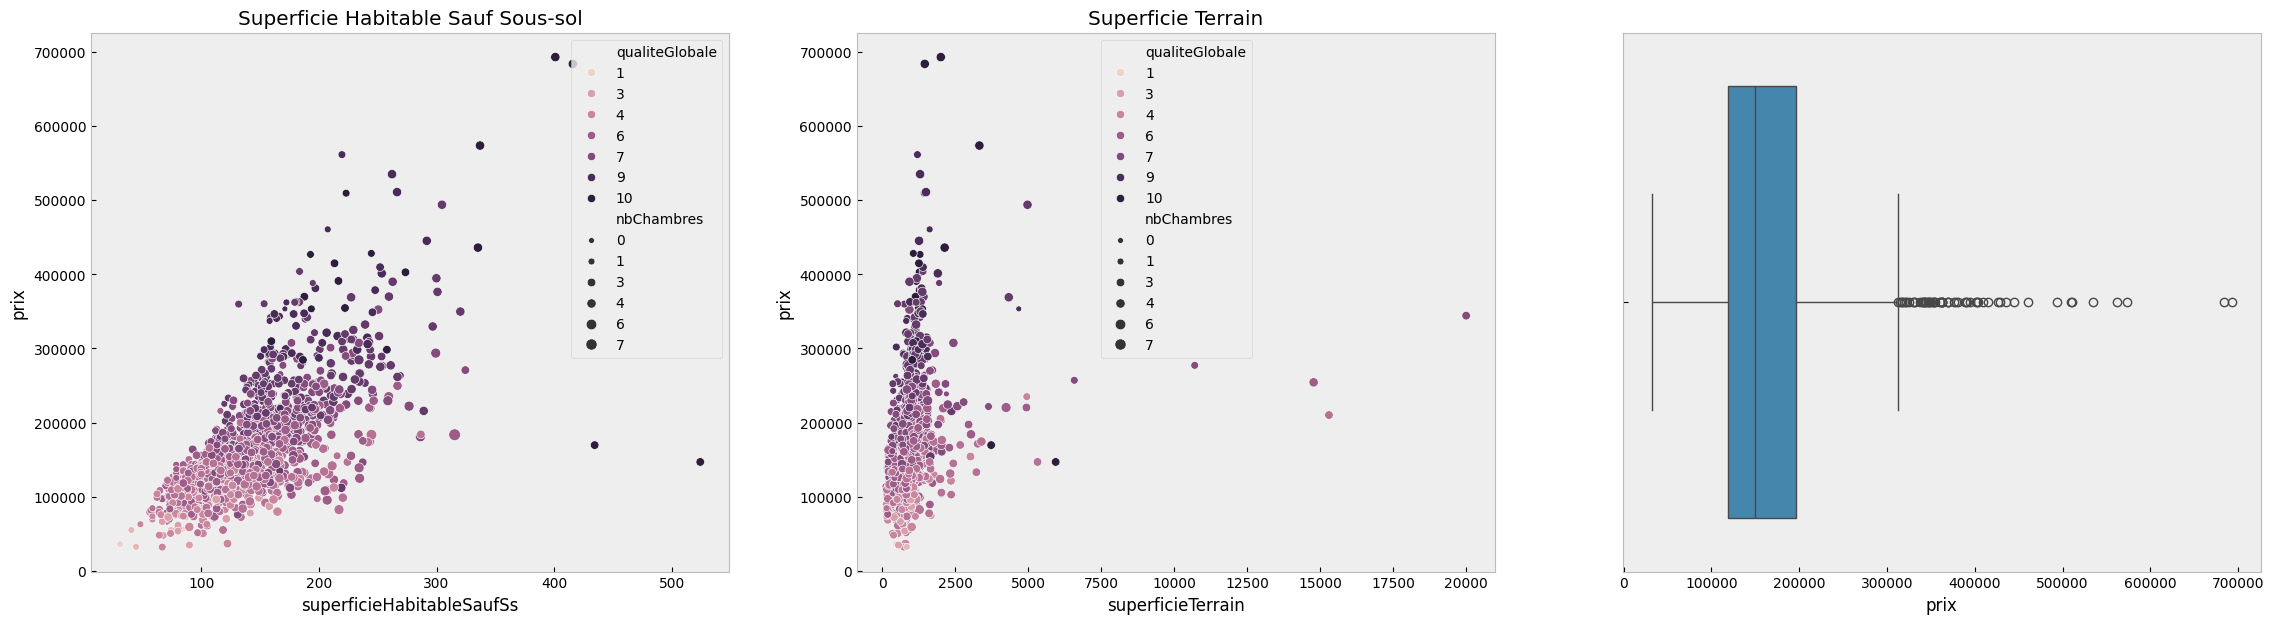

In [ ]:
fig, ax = plt.subplots(1,3,figsize = (28,7))
sns.scatterplot(x = df_train.superficieHabitableSaufSs,y = df_train.prix,size = df_train.nbChambres,hue = df_train.qualiteGlobale, ax = ax[0])
ax[0].set_title("Superficie Habitable Sauf Sous-sol")
sns.scatterplot(x = df_train.superficieTerrain,y = df_train.prix,size = df_train.nbChambres,hue = df_train.qualiteGlobale, ax = ax[1])
ax[1].set_title("Superficie Terrain")
sns.boxplot(x = df_train.prix);

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Intérpretation </strong>
    
Nous identifions les valeurs aberrantes suivantes :
- `superficieHabitableSaufSs` : les biens ayant une surface habitable de plus de 4 000 ft²
- `superficieTerrain` : les biens ayant une surface de terrain de plus de 100 000 ft²
- `prix` : les biens dont le prix de vente dépasse 500 000 USD

</div>

In [ ]:
# Récupération des noms des variables afin de faciliter leur réutilisation dans le code ultérieurement
cat_columns = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_columns)

['typeAlleeAcces', 'typeBatiment', 'conditionSousSol', 'expositionSousSol', 'qualiteSurfaceFinieSousSol1', 'qualiteSurfaceFinieSousSol2', 'qualiteSousSol', 'climatisation', 'proxRoute1', 'proxRoute2', 'systElectrique', 'conditionExterieur', 'qualiteExterieur', 'materiauExterieur1', 'materiauExterieur2', 'cloture', 'qualiteCheminee', 'fondation', 'fonctionnalites', 'conditionGarage', 'interieurGarage', 'qualiteGarage', 'typeGarage', 'chauffage', 'qualiteChauffage', 'styleBatiment', 'qualiteCuisine', 'contourTerrain', 'penteTerrain', 'configTerrain', 'formeTerrain', 'zonage', 'typePlacageMaconnerie', 'elementsDivers', 'quartier', 'alleePavee', 'qualitePiscine', 'materiauToit', 'styleToit', 'conditionVente', 'typeVente', 'typeRouteAcces', 'utilites']


In [ ]:
# Récupération des noms des variables afin de faciliter leur réutilisation dans le code ultérieurement
num_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_columns)

['superficieEtage1', 'superficieEtage2', 'superficieRallonge3Saisons', 'nbChambres', 'superficieFinieSousSol1', 'superficieFinieSousSol2', 'nbSallesBainSs', 'nbDemiSallesBainSs', 'superficieSousSolNonAmenagee', 'superficiePorcheFerme', 'nbCheminees', 'nbSallesBain', 'superficieGarage', 'nbPlacesVoiture', 'anneeConstrGarage', 'superficieHabitableSaufSs', 'nbDemiSallesBain', 'id', 'nbCuisines', 'superficieTerrain', 'longTerrainRue', 'superficieQualiteInferieure', 'typeClasseBatiment', 'superficiePlacageMaconnerie', 'valeursElementsDivers', 'moisVente', 'superficiePorcheOuvert', 'conditionGlobale', 'qualiteGlobale', 'superficiePiscine', 'prix', 'superficieSolarium', 'nbPieces', 'superficieTotaleSousSol', 'superficieTerrasseBois', 'anneeConstruction', 'anneeRenovation', 'anneeVente']


In [ ]:
# Liste des variables à afficher
variables = ['typeClasseBatiment', 'longTerrainRue', 'superficieTerrain', 'qualiteGlobale',
             'conditionGlobale', 'anneeConstruction', 'anneeRenovation', 'superficiePlacageMaconnerie',
             'superficieFinieSousSol1', 'superficieFinieSousSol2', 'superficieSousSolNonAmenagee',
             'superficieTotaleSousSol', 'superficieEtage1', 'superficieEtage2', 'superficieQualiteInferieure',
             'superficieHabitableSaufSs', 'nbSallesBainSs', 'nbDemiSallesBainSs', 'nbSallesBain',
             'nbDemiSallesBain', 'nbChambres', 'nbCuisines', 'nbPieces', 'nbCheminees', 'anneeConstrGarage',
             'nbPlacesVoiture', 'superficieGarage', 'superficieTerrasseBois', 'superficiePorcheOuvert',
             'superficiePorcheFerme', 'superficieRallonge3Saisons', 'superficieSolarium', 'superficiePiscine',
             'valeursElementsDivers', 'moisVente', 'anneeVente']

# Ajuster la taille de la figure
fig, axes = plt.subplots(18, 2, figsize=(20, 90))

# Ajuster l'espacement entre les sous-graphiques à des niveaux plus élevés
plt.subplots_adjust(wspace=0.7, hspace=0.7)

# Itérer sur chaque variable et créer un graphique catégoriel
for i, var in enumerate(variables):
    if i < len(variables):  # Vérifier si nous avons dépassé le nombre de variables
        sns.boxenplot(data=df_train, y='prix', x=var, ax=axes[i//2, i%2])
        axes[i//2, i%2].set_title(var)
        axes[i//2, i%2].set_xlabel('')
        axes[i//2, i%2].set_ylabel('Prix')

        # Mettre le texte de l'axe X en vertical
        axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=90)

    else:
        # Si nous avons moins de 2 graphiques par ligne, masquer les axes
        for j in range(i%2, 2):
            axes[i//2, j].axis('off')

# Supprimer les axes des graphiques non utilisés
for i in range(len(variables), 18*2):
    axes[i//2, i%2].axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
💡 <strong> Observation </strong>

- Suite à l'analyse approfondie des boxplots représentant les caractéristiques des logements par rapport aux prix, il est apparu que certains points de prix présentaient une déviation par rapport à la norme, **indiquant la présence de valeurs aberrantes**.
<br><br/>   
- Pour remédier à cette situation, une décision a été prise de définir un seuil pour identifier les prix extrêmes. En calculant le **99,5e centile de la distribution des prix**, une limite claire a été établie au-delà de laquelle les prix étaient considérés comme des valeurs aberrantes. Par la suite, afin de maintenir l'intégrité de l'ensemble de données tout en minimisant l'impact des valeurs extrêmes, les prix dépassant ce seuil ont été systématiquement supprimés.
<br><br/>   
- Cette approche stratégique visait à renforcer la **fiabilité** des analyses ultérieureset la **robustesse** du modèle et des modèles prédictifs en atténuant l'influence indue des données aberrantes tout en conservant les informations essentielles contenues dans l'ensemble de données.

</div>

In [ ]:
#!pip install plotly

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

### Variable "superficieHabitableSaufSs"

In [ ]:
import plotly.graph_objs as go

# Création du nuage de points avec la palette de couleurs Viridis
nuage_de_points = go.Scatter(
    x=df_train.superficieHabitableSaufSs,
    y=df_train.prix,
    mode='markers',
    marker=dict(color=df_train.prix, size=10, showscale=True, colorscale='Viridis'),
    name='Données'
)

# Création de la mise en page
mise_en_page = go.Layout(
    title='superficieHabitableSaufSs vs prix',
    xaxis=dict(title='superficieHabitableSaufSs'),
    yaxis=dict(title='prix')
)

# Création de la figure
fig = go.Figure(data=[nuage_de_points], layout=mise_en_page)
fig.show()

In [ ]:
# Scatter plot en utilisant Plotly
nuage_de_points = go.Scatter(
    x=df_train.superficieHabitableSaufSs,
    y=df_train.prix,
    mode='markers',
    marker=dict(color=df_train.prix, size=10, showscale=True, colorscale='Viridis'),
    name='Données'
)

# Création d'une ligne verticale à x=4000
ligne_repère = go.layout.Shape(
    type="line",
    x0=370,
    y0=min(df_train.prix),
    x1=370,
    y1=max(df_train.prix),
    line=dict(
        color="red",
        width=2,
        dash="dash",
    ),
)

# Mise en page
mise_en_page = go.Layout(
    title='superficieHabitableSaufSs vs prix',
    xaxis=dict(title='superficieHabitableSaufSs'),
    yaxis=dict(title='prix'),
    shapes=[ligne_repère],  # Ajout de la ligne verticale à la mise en page
)

# Tracer
fig = go.Figure(data=[nuage_de_points], layout=mise_en_page)
fig.show()

In [ ]:
# Supprimer les observations où la superficie habitable (superficieHabitableSaufSs) est supérieure à 4000 ft2 (approx. 370 m2)
df_train.drop(df_train[df_train.superficieHabitableSaufSs>370].index, inplace = True)
df_train.reset_index(drop = True, inplace = True)

<ipython-input-31-e4a1a5508a6a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Tracez à nouveau le diagramme de dispersion de superficieHabitableSaufSs par rapport à prix pour voir si les valeurs aberrantes ont disparu
import plotly.graph_objs as go

# Création du nuage de points
nuage_de_points = go.Scatter(
    x=df_train.superficieHabitableSaufSs,
    y=df_train.prix,
    mode='markers',
    marker=dict(color=df_train.prix, size=10, showscale=True, colorscale='Viridis'),
    name='Données'
)

# Création de la mise en page
mise_en_page = go.Layout(
    title='superficieHabitableSaufSs vs prix',
    xaxis=dict(title='superficieHabitableSaufSs'),
    yaxis=dict(title='prix')
)

# Création de la figure
fig = go.Figure(data=[nuage_de_points], layout=mise_en_page)
fig.show()

### Variable "superficieTerrain"

In [ ]:
# Création du nuage de points avec la palette de couleurs Viridis
nuage_de_points = go.Scatter(
    x=df_train.superficieTerrain,
    y=df_train.prix,
    mode='markers',
    marker=dict(color=df_train.prix, size=10, showscale=True, colorscale='Viridis'),
    name='Données'
)

# Création de la mise en page
mise_en_page = go.Layout(
    title='superficieTerrain vs prix',
    xaxis=dict(title='superficieTerrain'),
    yaxis=dict(title='prix')
)

# Création de la figure
fig = go.Figure(data=[nuage_de_points], layout=mise_en_page)
fig.show()

In [ ]:
# Création du nuage de points avec la palette de couleurs Viridis
nuage_de_points = go.Scatter(
    x=df_train.superficieTerrain,
    y=df_train.prix,
    mode='markers',
    marker=dict(color=df_train.prix, size=10, showscale=True, colorscale='Viridis'),
    name='Données'
)

# Création d'une ligne verticale à x=4000
ligne_repère = go.layout.Shape(
    type="line",
    x0=10000,
    y0=min(df_train.prix),
    x1=10000,
    y1=max(df_train.prix),
    line=dict(
        color="red",
        width=2,
        dash="dash",
    ),
)

mise_en_page = go.Layout(
    title='superficieTerrain vs prix',
    xaxis=dict(title='superficieTerrain'),
    yaxis=dict(title='prix'),
    shapes=[ligne_repère],  # Ajout de la ligne verticale à la mise en page
)

# Tracer
fig = go.Figure(data=[nuage_de_points], layout=mise_en_page)
fig.show()

In [ ]:
# Supprimer les observations où la superficie du terrain (superficieTerrain) est supérieure à 100 000 ft2 (approx. 10 000 m2)
df_train.drop(df_train[df_train.superficieTerrain>10000].index, inplace = True)
df_train.reset_index(drop = True, inplace = True)

<ipython-input-35-96762b03ab35>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Tracez à nouveau le diagramme de dispersion de superficieTerrain par rapport à prix pour voir si les valeurs aberrantes ont disparu
# Création du nuage de points avec la palette de couleurs Viridis
nuage_de_points = go.Scatter(
    x=df_train.superficieTerrain,
    y=df_train.prix,
    mode='markers',
    marker=dict(color=df_train.prix, size=10, showscale=True, colorscale='Viridis'),
    name='Données'
)

# Création de la mise en page
mise_en_page = go.Layout(
    title='superficieTerrain vs prix',
    xaxis=dict(title='superficieTerrain'),
    yaxis=dict(title='prix')
)

# Création de la figure
fig = go.Figure(data=[nuage_de_points], layout=mise_en_page)
fig.show()

### Variable "prix"

In [ ]:
df_train['prix'].quantile(0.995)

442812.216767999

In [ ]:
import plotly.graph_objs as go

# Création de l'histogramme pour la variable "prix" avec des bins personnalisés
histogramme = go.Histogram(
    x=df_train.prix,
    marker=dict(color='#075F65'),
    opacity=0.75
)

# Calcul du quantile de 99,5%
quantile_995 = df_train['prix'].quantile(0.995)

# Définition des bins personnalisés
bins = np.linspace(min(df_train.prix), max(df_train.prix), 30)

# Calcul des fréquences de chaque classe de l'histogramme
fréquences, _ = np.histogram(df_train.prix, bins=bins, density=False)

# Création de la mise en page avec la barre verticale
mise_en_page = go.Layout(
    title='Distribution des prix avec barre de quantile de 99.5%',
    xaxis=dict(title='Prix'),
    yaxis=dict(title='Fréquence'),
    shapes=[dict(
        type='line',
        x0=quantile_995,
        y0=0,
        x1=quantile_995,
        y1=max(fréquences),
        line=dict(
            color='red',
            width=2,
            dash='dash'
        )
    )]
)

# Création de la figure
fig = go.Figure(data=[histogramme], layout=mise_en_page)
fig.show()

In [ ]:
lignes_a_supp = df_train[df_train['prix'] > df_train['prix'].quantile(0.995)].index
df_train.drop(lignes_a_supp, inplace=True)
df_train.shape

<ipython-input-39-1b749f26324b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(1444, 81)

In [ ]:
import plotly.graph_objs as go

# Création de l'histogramme pour la variable "prix"
histogramme = go.Histogram(
    x=df_train.prix,
    marker=dict(color='#075F65'),
    opacity=0.75
)

# Création de la mise en page
mise_en_page = go.Layout(
    title='Distribution des prix',
    xaxis=dict(title='Prix'),
    yaxis=dict(title='Fréquence')
)

# Création de la figure
fig = go.Figure(data=[histogramme], layout=mise_en_page)
fig.show()

In [ ]:
# Exportation de la base de données obtenue après suppréssion de valeurs aberrantes
df_train.to_csv('df_train_va.csv', index = False)

In [ ]:
df_train_va = pd.read_csv('df_train_va.csv')
df_train_va.head()

superficieEtage1  superficieEtage2  superficieRallonge3Saisons  \
0               856               854                           0   
1              1262                 0                           0   
2               920               866                           0   
3               961               756                           0   
4              1145              1053                           0   

  typeAlleeAcces  nbChambres typeBatiment conditionSousSol expositionSousSol  \
0            NaN           3         1Fam               TA                No   
1            NaN           3         1Fam               TA                Gd   
2            NaN           3         1Fam               TA                Mn   
3            NaN           3         1Fam               Gd                No   
4            NaN           4         1Fam               TA                Av   

   superficieFinieSousSol1  superficieFinieSousSol2  ... typeVente  \
0                    706.0                      0.0  ...        WD   
1                    978.0                      0.0  ...        WD   
2                    486.0                      0.0  ...        WD   
3                    216.0                      0.0  ...        WD   
4                    655.0                      0.0  ...        WD   

  superficieSolarium  typeRouteAcces  nbPieces superficieTotaleSousSol  \
0                  0            Pave         8               79.525002   
1                  0            Pave         6              117.243636   
2                  0            Pave         6               85.470797   
3                  0            Pave         7               70.234698   
4                  0            Pave         9              106.373981   

   utilites superficieTerrasseBois anneeConstruction anneeRenovation  \
0    AllPub               0.000000              2003            2003   
1    AllPub              27.685106              1976            1976   
2    AllPub               0.000000              2001            2002   
3    AllPub               0.000000              1915            1970   
4    AllPub              17.837384              2000            2000   

  anneeVente  
0       2008  
1       2007  
2       2008  
3       2006  
4       2008  

[5 rows x 81 columns]

## 4.2 - Traitement des données manquantes <a class="anchor"  id="dmanquantes"></a>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
📚 <strong> Définition </strong>

La prochaine étape de notre exploration des données est l'identification des valeurs manquantes.

Les **valeurs manquantes**, ou les données manquantes, se produisent lorsque des informations ne sont pas disponibles ou non enregistrées pour des variables ou des observations spécifiques.

Pour les variables catégorielles, une imputation par mode sera réalisée, tandis que pour les variables numériques, une imputation par moyenne sera effectuée si leur distribution est symétrique (ou presque symétrique, comme l'âge qui suit une distribution normale). En revanche, pour une variable présentant une distribution asymétrique et des valeurs aberrantes, l'imputation par médiane sera recommandée, car la médiane est plus résistante aux valeurs aberrantes que la moyenne.

Puisque pour la modélisation nous ne voulons pas de valeurs manquantes ni dans la base de données d'entraînement ni dans la base de données de test, nous traiterons les valeurs manquantes pour les deux ensembles de données.
</div>

In [ ]:
'''# Séparons d'abord notre variable cible
y_train = df_train_va.prix

# Supprimons SalePrice des données d'entraînement
df_train_va.drop('prix', axis=1, inplace=True)

# Maintenant, combinons les données d'entraînement et de test ensemble
df_merged = pd.concat([df_train_va, df_test], axis=0)
df_merged.shape'''

In [ ]:
y_train = df_train_va.prix
df_merged = pd.concat([df_train_va, df_test], axis=0)
df_merged.shape

(2903, 81)

In [ ]:
# Le nombre de données manquantes
VM = df_merged.isnull().sum()
VM2=VM[VM > 0]
VM2

typeAlleeAcces                  2705
conditionSousSol                  82
expositionSousSol                 82
superficieFinieSousSol1            1
superficieFinieSousSol2            1
qualiteSurfaceFinieSousSol1       79
qualiteSurfaceFinieSousSol2       80
nbSallesBainSs                     2
nbDemiSallesBainSs                 2
qualiteSousSol                    81
superficieSousSolNonAmenagee       1
systElectrique                     1
materiauExterieur1                 1
materiauExterieur2                 1
cloture                         2333
qualiteCheminee                 1420
fonctionnalites                    2
superficieGarage                   1
nbPlacesVoiture                    1
conditionGarage                  159
interieurGarage                  159
qualiteGarage                    159
typeGarage                       157
anneeConstrGarage                159
qualiteCuisine                     1
longTerrainRue                   483
zonage                             4
s

In [ ]:
df_merged['prix']

0       191369.77344
1       166588.07616
2       205137.38304
3       128497.68960
4       229460.16000
            ...     
1454             NaN
1455             NaN
1456             NaN
1457             NaN
1458             NaN
Name: prix, Length: 2903, dtype: float64

In [ ]:
nombre_total_observations = len(df_merged.index)

# Calcul de la proportion de données manquantes
prop_don_manquantes = (VM2 / nombre_total_observations) * 100

prop_don_manquantes

typeAlleeAcces                  93.179470
conditionSousSol                 2.824664
expositionSousSol                2.824664
superficieFinieSousSol1          0.034447
superficieFinieSousSol2          0.034447
qualiteSurfaceFinieSousSol1      2.721323
qualiteSurfaceFinieSousSol2      2.755770
nbSallesBainSs                   0.068894
nbDemiSallesBainSs               0.068894
qualiteSousSol                   2.790217
superficieSousSolNonAmenagee     0.034447
systElectrique                   0.034447
materiauExterieur1               0.034447
materiauExterieur2               0.034447
cloture                         80.365140
qualiteCheminee                 48.914916
fonctionnalites                  0.068894
superficieGarage                 0.034447
nbPlacesVoiture                  0.034447
conditionGarage                  5.477093
interieurGarage                  5.477093
qualiteGarage                    5.477093
typeGarage                       5.408198
anneeConstrGarage                5

In [ ]:
# Calculer le nombre total d'observations
nombre_total_observations = len(df_merged.index)

# Calculer le nombre de valeurs manquantes par colonne
VM = df_merged.isnull().sum()

# Filtrer les colonnes avec des valeurs manquantes
VM2 = VM[VM > 0]

# Calculer le pourcentage de valeurs manquantes par rapport au total
prop_don_manquantes = (VM2 / nombre_total_observations) * 100

# Créer un DataFrame pour stocker ces informations
missing_data = pd.DataFrame({'Nombre de valeurs manquantes': VM2, 'Pourcentage': prop_don_manquantes})

# Trier les données par ordre décroissant du nombre de valeurs manquantes
missing_data = missing_data.sort_values(by='Nombre de valeurs manquantes', ascending=False)

missing_data

Nombre de valeurs manquantes  Pourcentage
qualitePiscine                                        2895    99.724423
elementsDivers                                        2800    96.451946
typeAlleeAcces                                        2705    93.179470
cloture                                               2333    80.365140
prix                                                  1459    50.258353
qualiteCheminee                                       1420    48.914916
longTerrainRue                                         483    16.637961
interieurGarage                                        159     5.477093
qualiteGarage                                          159     5.477093
anneeConstrGarage                                      159     5.477093
conditionGarage                                        159     5.477093
typeGarage                                             157     5.408198
conditionSousSol                                        82     2.824664
expositionSousSol                                       82     2.824664
qualiteSousSol                                          81     2.790217
qualiteSurfaceFinieSousSol2                             80     2.755770
qualiteSurfaceFinieSousSol1                             79     2.721323
typePlacageMaconnerie                                   24     0.826731
superficiePlacageMaconnerie                             23     0.792284
zonage                                                   4     0.137788
utilites                                                 2     0.068894
fonctionnalites                                          2     0.068894
nbDemiSallesBainSs                                       2     0.068894
nbSallesBainSs                                           2     0.068894
nbPlacesVoiture                                          1     0.034447
materiauExterieur2                                       1     0.034447
qualiteCuisine                                           1     0.034447
materiauExterieur1                                       1     0.034447
systElectrique                                           1     0.034447
superficieSousSolNonAmenagee                             1     0.034447
superficieFinieSousSol2                                  1     0.034447
superficieFinieSousSol1                                  1     0.034447
typeVente                                                1     0.034447
superficieTotaleSousSol                                  1     0.034447
superficieGarage                                         1     0.034447

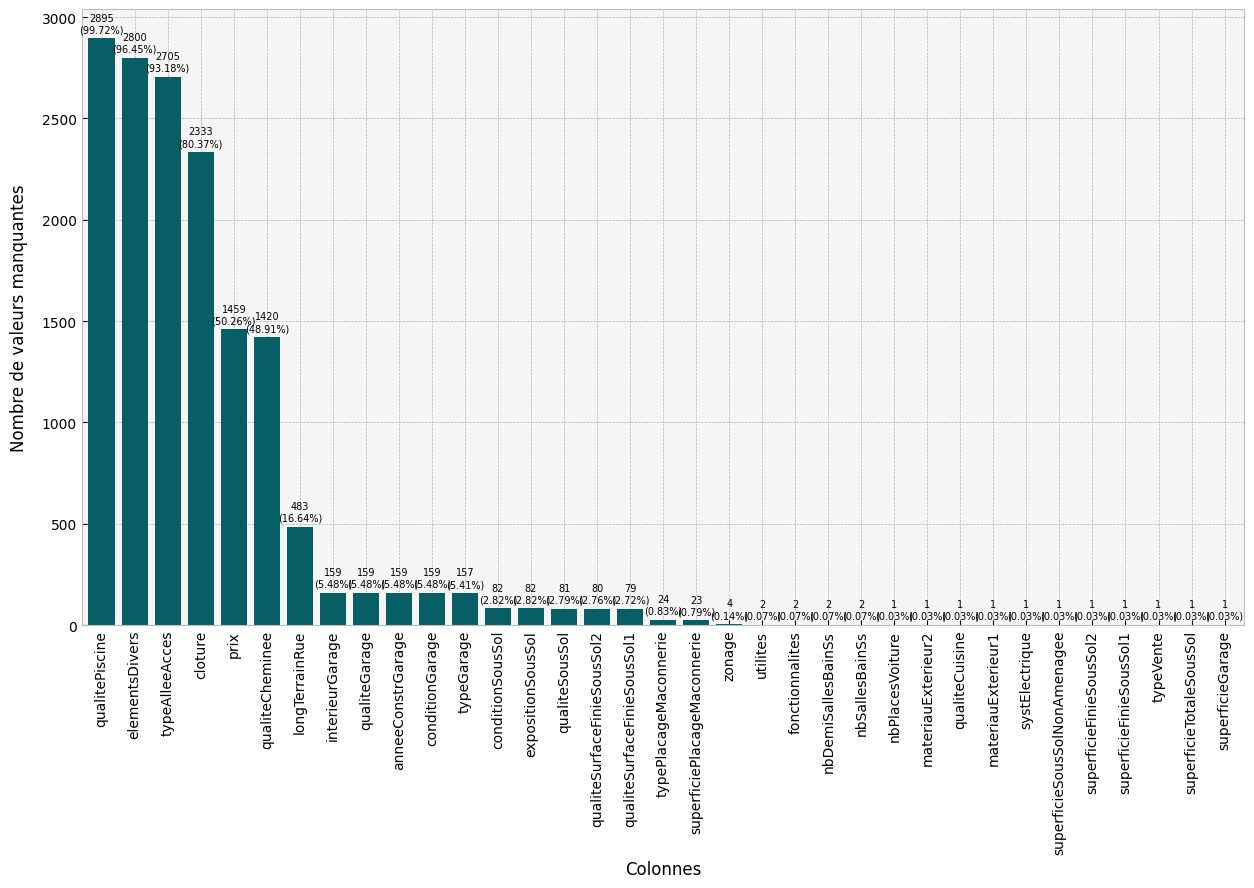

In [ ]:
# Tracer le graphique
fig, ax = plt.subplots(figsize=(15, 8))  # Augmenter la largeur de la figure
ax.grid()
ax.set_facecolor('#F5F5F5')  # Définir une couleur de fond plus claire

bars = ax.bar(missing_data.index, missing_data['Nombre de valeurs manquantes'], zorder=2, color="#075F65", width=0.8)  # Augmenter la largeur des barres
ax.set_ylabel("Nombre de valeurs manquantes", labelpad=10)
ax.set_xlabel("Colonnes")
ax.set_xlim(-0.6, len(missing_data) - 0.4)
ax.xaxis.set_tick_params(rotation=90)

# Ajouter des annotations de texte avec une taille de police plus petite
for bar, percentage in zip(bars, missing_data['Pourcentage']):
    height = bar.get_height()
    ax.annotate(f'{height}\n({percentage:.2f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=7)  # Augmenter la taille de la police

plt.show()

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px; display: inline-block;">
⚙️ <strong> Interprétation </strong>

- Nous constatons que certaines variables comme `qualitePiscine`, `cloture`, `elementsDivers` et `typeAlleeAcces` entre autres présentent des données manquantes. Cependant, ces données ne sont pas véritablement manquantes. En effet, pour PoolQC, qui indique la qualité de la piscine, une absence de données signifie qu'il n'y a pas de piscine. De même, pour `cloture`, `typeAlleeAcces` et `elementsDivers`, **l'absence de données indique simplement l'absence de ces caractéristiques**. Nous considérons donc que ces données ne sont pas manquantes, mais simplement le reflet de l'absence de certaines caractéristiques.
<br><br/>
- Nous allons donc attribuer la valeur _"No (characteristic)"_ aux valeurs manquantes pour **les variables catégorielles**. Pour **les variables numériques**, nous remplacerons par 0 pour les variables `anneeConstructionGarage`, `superficiePlacageMaconnerie`  et `typePlacageMaconnerie`, car l'absence de données indique l'absence de garage et de placage de maçonnerie. En ce qui concerne `longTerrainRue`, nous remplacerons par la moyenne, car cela indique nécessairement une erreur ou une donnée non renseignée, étant donné qu'il y a forcément une superficie entre la propriété et la rue.
    
</div>

In [ ]:
modalites_var = df_merged['typePlacageMaconnerie'].unique()
modalites_var

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [ ]:
# Variables catégorielles

#typeAlleeAcces
def typeAlleeAcces(value):
    if pd.isnull(value):
        return 'No alley access'
    else:
        return value

df_merged['typeAlleeAcces'] = df_merged['typeAlleeAcces'].apply(typeAlleeAcces)

#qualitePiscine
def qualitePiscine(value):
    if pd.isnull(value):
        return 'No Pool'
    else:
        return value
df_merged['qualitePiscine'] = df_merged['qualitePiscine'].apply(qualitePiscine)

# cloture
def cloture(value):
    if pd.isnull(value):
        return 'No Fence'
    else:
        return value

df_merged['cloture'] = df_merged['cloture'].apply(cloture)

#elementsDivers
def elementsDivers(value):
    if pd.isnull(value):
        return 'No Miscellaneous feature'
    else:
        return value

df_merged['elementsDivers'] = df_merged['elementsDivers'].apply(elementsDivers)

# qualiteCheminee
def qualiteCheminee(value):
    if pd.isnull(value):
        return 'No Fireplace'
    else:
        return value

df_merged['qualiteCheminee'] = df_merged['qualiteCheminee'].apply(qualiteCheminee)

# typePlacageMaconnerie
def typePlacageMaconnerie(value):
    if pd.isnull(value):
        return 'None'
    elif value == 'nan':
        return 'None'
    elif value == 0:
        return 'None'
    else:
        return value

df_merged['typePlacageMaconnerie'] = df_merged['typePlacageMaconnerie'].apply(typePlacageMaconnerie)


#qualiteSousSol
def qualiteSousSol(value):
    if pd.isnull(value):
        return 'No Basement'
    else:
        return value

df_merged['qualiteSousSol'] = df_merged['qualiteSousSol'].apply(qualiteSousSol)

#conditionSousSol
def conditionSousSol(value):
    if pd.isnull(value):
        return 'No Basement'
    else:
        return value

df_merged['conditionSousSol'] = df_merged['conditionSousSol'].apply(conditionSousSol)

#expositionSousSol
def expositionSousSol(value):
    if pd.isnull(value):
        return 'No Basement'
    else:
        return value

df_merged['expositionSousSol'] = df_merged['expositionSousSol'].apply(expositionSousSol)


#qualiteSurfaceFinieSousSol1
def qualiteSurfaceFinieSousSol1(value):
    if pd.isnull(value):
        return 'No Basement'
    else:
        return value

df_merged['qualiteSurfaceFinieSousSol1'] = df_merged['qualiteSurfaceFinieSousSol1'].apply(qualiteSurfaceFinieSousSol1)

#qualiteSurfaceFinieSousSol2
def qualiteSurfaceFinieSousSol2(value):
    if pd.isnull(value):
        return 'No Basement'
    else:
        return value

df_merged['qualiteSurfaceFinieSousSol2'] = df_merged['qualiteSurfaceFinieSousSol2'].apply(qualiteSurfaceFinieSousSol2)

#typeGarage
def typeGarage(value):
    if pd.isnull(value):
        return 'No Garage'
    else:
        return value

df_merged['typeGarage'] = df_merged['typeGarage'].apply(typeGarage)

#interieurGarage
def interieurGarage(value):
    if pd.isnull(value):
        return 'No Garage'
    else:
        return value

df_merged['interieurGarage'] = df_merged['interieurGarage'].apply(interieurGarage)

#qualiteGarage
def qualiteGarage(value):
    if pd.isnull(value):
        return 'No Garage'
    else:
        return value

df_merged['qualiteGarage'] = df_merged['qualiteGarage'].apply(qualiteGarage)


#conditionGarage
def conditionGarage(value):
    if pd.isnull(value):
        return 'No Garage'
    else:
        return value

df_merged['conditionGarage'] = df_merged['conditionGarage'].apply(conditionGarage)

# **Valeurs manquantes base test**
# zonage
def zonage(value):
    if pd.isnull(value):
        return 'Zonage inconnu'
    else:
        return value

df_merged['zonage'] = df_merged['zonage'].apply(zonage)

# zonage
def utilites(value):
    if pd.isnull(value):
        return 'Utilités inconnues'
    else:
        return value

df_merged['utilites'] = df_merged['utilites'].apply(utilites)

# materiauExterieur1
def materiauExterieur1(value):
    if pd.isnull(value):
        return 'Inconnu'
    else:
        return value

df_merged['materiauExterieur1'] = df_merged['materiauExterieur1'].apply(materiauExterieur1)

# materiauExterieur2
def materiauExterieur2(value):
    if pd.isnull(value):
        return 'Inconnu'
    else:
        return value

df_merged['materiauExterieur2'] = df_merged['materiauExterieur2'].apply(materiauExterieur2)

# qualiteCuisine
def qualiteCuisine(value):
    if pd.isnull(value):
        return 'Inconnu'
    else:
        return value

df_merged['qualiteCuisine'] = df_merged['qualiteCuisine'].apply(qualiteCuisine)

# fonctionnalites
def fonctionnalites(value):
    if pd.isnull(value):
        return 'Inconnu'
    else:
        return value

df_merged['fonctionnalites'] = df_merged['fonctionnalites'].apply(fonctionnalites)

# typeVente
def typeVente(value):
    if pd.isnull(value):
        return 'Inconnu'
    else:
        return value

df_merged['typeVente'] = df_merged['typeVente'].apply(typeVente)

In [ ]:
modalites_var = df_merged['qualiteSurfaceFinieSousSol2'].unique()
modalites_var

array(['Unf', 'BLQ', 'No Basement', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
      dtype=object)

In [ ]:
modalites_var = df_merged['typePlacageMaconnerie'].unique()
modalites_var

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [ ]:
# Variables numériques

# longTerrainRue
mean_value = df_merged['longTerrainRue'].mean()
df_merged['longTerrainRue'].fillna(mean_value, inplace=True)

# GarageYrBlt
df_merged['anneeConstrGarage'].fillna(0, inplace=True)

# superficiePlacageMaconnerie
df_merged['superficiePlacageMaconnerie'].fillna(0, inplace=True)


# **Valeurs manquantes base test**
# superficieFinieSousSol1
mean_value = df_merged['superficieFinieSousSol1'].mean()
df_merged['superficieFinieSousSol1'].fillna(mean_value, inplace=True)

# superficieFinieSousSol2
mean_value = df_merged['superficieFinieSousSol2'].mean()
df_merged['superficieFinieSousSol2'].fillna(mean_value, inplace=True)

# superficieSousSolNonAmenagee
df_merged['superficieSousSolNonAmenagee'].fillna(0, inplace=True)

# superficieTotaleSousSol
df_merged['superficieTotaleSousSol'].fillna(0, inplace=True)

# nbSallesBainSs
mean_value = df_merged['nbSallesBainSs'].mean()
df_merged['nbSallesBainSs'].fillna(mean_value, inplace=True)

# nbDemiSallesBainSs
mean_value = df_merged['nbDemiSallesBainSs'].mean()
df_merged['nbDemiSallesBainSs'].fillna(mean_value, inplace=True)

# nbPlacesVoiture
mean_value = df_merged['nbPlacesVoiture'].mean()
df_merged['nbPlacesVoiture'].fillna(mean_value, inplace=True)

# superficieGarage
mean_value = df_merged['superficieGarage'].mean()
df_merged['superficieGarage'].fillna(mean_value, inplace=True)

In [ ]:
# Test
df_merged['superficiePlacageMaconnerie'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 9.800e+01, 2.750e+02,
       1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02, 1.530e+02,
       6.400e+01, 3.120e+02, 1.600e+01, 9.220e+02, 

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

En ce qui concerne la variable `systElectrique`, nous remarquons clairement une valeur manquante. En effet, dans un logement, il est impossible qu'il n'y ait pas de système électrique. Par conséquent, nous avons opté pour l'imputation de ces données en utilisant la méthode du mode.
    
</div>

In [ ]:
# Remplacement des données manquantes par le mode:

df_merged['systElectrique'].fillna(df_merged['systElectrique'].mode()[0], inplace=True)

In [ ]:
# Calculer le nombre total d'observations
nombre_total_observations = len(df_merged.index)

# Calculer le nombre de valeurs manquantes par colonne
VM = df_merged.isnull().sum()

# Filtrer les colonnes avec des valeurs manquantes
VM2 = VM[VM > 0]

# Calculer le pourcentage de valeurs manquantes par rapport au total
prop_don_manquantes = (VM2 / nombre_total_observations) * 100

# Créer un DataFrame pour stocker ces informations
missing_data = pd.DataFrame({'Nombre de valeurs manquantes': VM2, 'Pourcentage': prop_don_manquantes})

# Trier les données par ordre décroissant du nombre de valeurs manquantes
missing_data = missing_data.sort_values(by='Nombre de valeurs manquantes', ascending=False)

missing_data

Nombre de valeurs manquantes  Pourcentage
prix                          1459    50.258353

In [ ]:
# Aperçu du dataset
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   superficieEtage1              2903 non-null   int64  
 1   superficieEtage2              2903 non-null   int64  
 2   superficieRallonge3Saisons    2903 non-null   int64  
 3   typeAlleeAcces                2903 non-null   object 
 4   nbChambres                    2903 non-null   int64  
 5   typeBatiment                  2903 non-null   object 
 6   conditionSousSol              2903 non-null   object 
 7   expositionSousSol             2903 non-null   object 
 8   superficieFinieSousSol1       2903 non-null   float64
 9   superficieFinieSousSol2       2903 non-null   float64
 10  qualiteSurfaceFinieSousSol1   2903 non-null   object 
 11  qualiteSurfaceFinieSousSol2   2903 non-null   object 
 12  nbSallesBainSs                2903 non-null   float64
 13  nbD

In [ ]:
# Vérification da la taille du dataframe
df_merged.shape

(2903, 81)

In [ ]:
# Affichage des noms de colonnes pour faciliter leur réutilisation dans le code ultérieur
print(df_merged.columns)

Index(['superficieEtage1', 'superficieEtage2', 'superficieRallonge3Saisons',
       'typeAlleeAcces', 'nbChambres', 'typeBatiment', 'conditionSousSol',
       'expositionSousSol', 'superficieFinieSousSol1',
       'superficieFinieSousSol2', 'qualiteSurfaceFinieSousSol1',
       'qualiteSurfaceFinieSousSol2', 'nbSallesBainSs', 'nbDemiSallesBainSs',
       'qualiteSousSol', 'superficieSousSolNonAmenagee', 'climatisation',
       'proxRoute1', 'proxRoute2', 'systElectrique', 'superficiePorcheFerme',
       'conditionExterieur', 'qualiteExterieur', 'materiauExterieur1',
       'materiauExterieur2', 'cloture', 'qualiteCheminee', 'nbCheminees',
       'fondation', 'nbSallesBain', 'fonctionnalites', 'superficieGarage',
       'nbPlacesVoiture', 'conditionGarage', 'interieurGarage',
       'qualiteGarage', 'typeGarage', 'anneeConstrGarage',
       'superficieHabitableSaufSs', 'nbDemiSallesBain', 'chauffage',
       'qualiteChauffage', 'styleBatiment', 'id', 'nbCuisines',
       'qualiteCuisine

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
💡 <strong> Observation </strong>
    
Certaines variables sont incorrectement typées. Une mise à jour des types de variables sera effectuée ultérieurement.
    
</div>

## 5 - Transformations de distributions <a class="anchor"  id="transf_distrib"></a>

In [ ]:
# Fonction pour tracer un histogramme
def plot_histogram(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

In [ ]:
# Tracer la distribution de prix avec la skweness (asymétrie)
titre = 'Variable "prix" sans Transformation (asymétrie: {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, titre, 'Fréquence Absolue', '#075F65')

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Intérpretation </strong>

Une asymétrie de 1.1918 indique une distribution modérément asymétrique. Plus précisément, cela signifie que la distribution des données est inclinée vers la droite (positivement asymétrique), ce qui indique que la queue de la distribution est plus longue du côté des valeurs élevées par rapport à la queue du côté des valeurs faibles. En d'autres termes, il y a une tendance à avoir plus de valeurs élevées que de valeurs basses dans les données.
    
</div>

In [ ]:
# Tracer la distribution de prix en supprimant l'asymétrie

y_train = np.log1p(y_train)
titre = 'Variable "prix" après Transformation (asymétrie : {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, titre, 'Fréquence Absolue', '#075F65')

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Intérpretation </strong>

Une asymétrie de -0.0469 indique une distribution légèrement asymétrique mais pratiquement symétrique. Cela signifie que la distribution des données est presque équilibrée, avec peu ou pas de prédominance pour les valeurs élevées ou basses. En d'autres termes, il n'y a pas de tendance marquée à avoir plus de valeurs élevées ou basses dans les données.
    
</div>

In [ ]:
# Fonction pour tracer un graphique à barres
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(
    x = x,
    y = y,
    marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

In [ ]:
# Calculons maintenant et traçons l'asymétrie pour le reste des variables explicatives
asymetrie_merged = pd.DataFrame(data=df_merged.select_dtypes(include=['int64', 'float64']).skew(), columns=['Asymétrie'])
asymetrie_merged_trié = asymetrie_merged.sort_values(ascending=False, by='Asymétrie')
bar_plot(asymetrie_merged_trié.index, asymetrie_merged_trié.Asymétrie, 'Asymétrie dans les Variables Explicatives', 'Asymétrie', 'Viridis')

In [ ]:
# Extraire les variables numériques des données fusionnées
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [ ]:
df_merged_num.to_csv('df_merged_num.csv', index = False)

In [ ]:
# Obtenir l'index des données à transformer
bold('**Variables à transformer (asymétrie > 0.75) :**')
display(df_merged_num.skew()[df_merged_num.skew()>0.75].index.values)

**Variables à transformer (asymétrie > 0.75) :**

array(['superficieEtage1', 'superficieEtage2',
       'superficieRallonge3Saisons', 'superficieFinieSousSol1',
       'superficieFinieSousSol2', 'nbDemiSallesBainSs',
       'superficieSousSolNonAmenagee', 'superficiePorcheFerme',
       'superficieHabitableSaufSs', 'nbCuisines', 'superficieTerrain',
       'longTerrainRue', 'superficieQualiteInferieure',
       'typeClasseBatiment', 'superficiePlacageMaconnerie',
       'valeursElementsDivers', 'superficiePorcheOuvert',
       'superficiePiscine', 'prix', 'superficieSolarium',
       'superficieTerrasseBois'], dtype=object)

In [ ]:
# Faire la transformation
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew()>0.75].index])

df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew()< 0.75].index]

df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

In [ ]:
# Mettre à jour les variables numériques avec les variables transformées
df_merged_num.update(df_merged_num_all)

In [ ]:
# Calculer le nombre total d'observations
nombre_total_observations = len(df_merged_num.index)

# Calculer le nombre de valeurs manquantes par colonne
VM = df_merged_num.isnull().sum()

# Filtrer les colonnes avec des valeurs manquantes
VM2 = VM[VM > 0]

# Calculer le pourcentage de valeurs manquantes par rapport au total
prop_don_manquantes = (VM2 / nombre_total_observations) * 100

# Créer un DataFrame pour stocker ces informations
missing_data = pd.DataFrame({'Nombre de valeurs manquantes': VM2, 'Pourcentage': prop_don_manquantes})

# Trier les données par ordre décroissant du nombre de valeurs manquantes
missing_data = missing_data.sort_values(by='Nombre de valeurs manquantes', ascending=False)

missing_data

Nombre de valeurs manquantes  Pourcentage
prix                          1459    50.258353

In [ ]:
df_merged_num.shape

(2903, 38)

In [ ]:
df_merged_num_all.shape

(2903, 38)

In [ ]:
df_merged.shape

(2903, 81)

In [ ]:
df_merged_num.to_csv('df_merged_num.csv', index = False)

In [ ]:
df_merged_num_all.to_csv('df_merged_num_all.csv', index = False)

In [ ]:
df_merged.to_csv('df_merged.csv', index = False)

## 6 - Correction du type des variables <a class="anchor"  id="correction_type"></a>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
💡 <strong> Observation </strong>

Nous allons transformer toutes les variables de type 'Object' en 'Category' car ce type est plus efficace en termes de mémoire et de performances pour les colonnes contenant un petit nombre de valeurs uniques répétées. Ensuite, nous vérifierons que les variables sont correctement typées.    
</div>

In [ ]:
df_merged.info()

In [ ]:
#Liste des variables de type 'Object'
for col in df_merged.select_dtypes('object', 'category') :
    print(f'{col :-<20}, {df_merged[col].unique()}')

In [ ]:
# Récupération des noms des variables afin de faciliter leur réutilisation dans le code ultérieurement
cat_columns = df_merged.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_columns)

In [ ]:
# Transformation des variables de type 'object' en type 'category'

# Stockage des noms de variables concernées dans la variable columns_to_convert
columns_to_convert = ['zonage', 'typeRouteAcces', 'typeAlleeAcces', 'formeTerrain',
                      'contourTerrain', 'utilites', 'configTerrain',
                      'penteTerrain', 'quartier', 'proxRoute1', 'proxRoute2',
                      'typeBatiment', 'styleBatiment', 'styleToit', 'materiauToit',
                      'materiauExterieur1', 'materiauExterieur2', 'typePlacageMaconnerie',
                      'qualiteExterieur', 'conditionExterieur', 'fondation',
                      'qualiteSousSol', 'conditionSousSol', 'expositionSousSol',
                      'qualiteSurfaceFinieSousSol1', 'qualiteSurfaceFinieSousSol2', 'chauffage',
                      'qualiteChauffage', 'climatisation', 'systElectrique',
                      'qualiteCuisine', 'fonctionnalites', 'qualiteCheminee', 'typeGarage', 'interieurGarage',
                      'qualiteGarage', 'conditionGarage', 'alleePavee',
                      'qualitePiscine', 'cloture', 'elementsDivers', 'typeVente', 'conditionVente']

#Fonction de conversion
def convert_to_categorical(data_etape3, columns):
    for col in columns:
        df_merged[col] = df_merged[col].astype('category')
    return df_merged

df_merged = convert_to_categorical(df_merged, columns_to_convert)

print(df_merged.dtypes)


In [ ]:
# Vérification du type des variables numériques
# Nous procédons d'abord à la vérification de la distribution des variables numériques
for col in df_merged.columns:
    if df_merged[col].dtype != 'category':
        print(f'{col :-<25}, Min: {df_merged[col].min()}, Max: {df_merged[col].max()}')

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
💡 <strong> Observation </strong>

De cette manière, nous pouvons observer les variables de type 'float' et 'int', ce qui nous permet de les convertir au type approprié si nécessaire.    
</div>

In [ ]:
# Récupération des noms des variables afin de faciliter leur réutilisation dans le code ultérieurement
cat_columns = df_merged.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(cat_columns)

In [ ]:
# Transformation des variables catégorielles de type 'float' ou 'int' en type 'category'
columns_to_convert = ['typeClasseBatiment','qualiteGlobale','conditionGlobale']

def convert_to_categorical(df_merged, columns):
    for col in columns:
        df_merged[col] = df_merged[col].astype('category')
    return df_merged

df_merged = convert_to_categorical(df_merged, columns_to_convert)

print(df_merged.dtypes)

In [ ]:
# Vérification du type des variables numériques
# Nous procédons d'abord à la vérification de la distribution des variables numériques
for col in df_merged.columns:
    if df_merged[col].dtype != 'category':
        print(f'{col :-<25}, Min: {df_merged[col].min()}, Max: {df_merged[col].max()}')

In [ ]:
# Transformation de la variable anneeConstrGarage de type 'float' en 'int'
columns_to_convert = ['anneeConstrGarage']

def convert_to_categorical(df_merged, columns):
    for col in columns:
        df_merged[col] = df_merged[col].astype('int64')
    return df_merged

df_merged = convert_to_categorical(df_merged, columns_to_convert)

print(df_merged.dtypes)

superficieEtage1                 int64
superficieEtage2                 int64
superficieRallonge3Saisons       int64
typeAlleeAcces                category
nbChambres                       int64
                                ...   
utilites                      category
superficieTerrasseBois         float64
anneeConstruction                int64
anneeRenovation                  int64
anneeVente                       int64
Length: 81, dtype: object


In [ ]:
#Transformation des variables numériques de type 'int' en type 'float'
columns_to_convert = ['superficieTerrain', 'superficieFinieSousSol1', 'superficieFinieSousSol2',
                      'superficieSousSolNonAmenagee', 'superficieTotaleSousSol', 'superficieEtage1', 'superficieEtage2', 'superficieQualiteInferieure',
                      'superficieHabitableSaufSs', 'superficieGarage', 'superficieTerrasseBois', 'superficiePorcheOuvert', 'superficiePorcheFerme',
                      'superficieRallonge3Saisons', 'superficieSolarium', 'superficiePiscine']

def convert_to_categorical(df_merged, columns):
    for col in columns:
        df_merged[col] = df_merged[col].astype('float64')
    return df_merged

df_merged = convert_to_categorical(df_merged, columns_to_convert)

print(df_merged.dtypes)


superficieEtage1               float64
superficieEtage2               float64
superficieRallonge3Saisons     float64
typeAlleeAcces                category
nbChambres                       int64
                                ...   
utilites                      category
superficieTerrasseBois         float64
anneeConstruction                int64
anneeRenovation                  int64
anneeVente                       int64
Length: 81, dtype: object


In [ ]:
#Aperçu de la base de données
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   superficieEtage1              2903 non-null   float64 
 1   superficieEtage2              2903 non-null   float64 
 2   superficieRallonge3Saisons    2903 non-null   float64 
 3   typeAlleeAcces                2903 non-null   category
 4   nbChambres                    2903 non-null   int64   
 5   typeBatiment                  2903 non-null   category
 6   conditionSousSol              2903 non-null   category
 7   expositionSousSol             2903 non-null   category
 8   superficieFinieSousSol1       2903 non-null   float64 
 9   superficieFinieSousSol2       2903 non-null   float64 
 10  qualiteSurfaceFinieSousSol1   2903 non-null   category
 11  qualiteSurfaceFinieSousSol2   2903 non-null   category
 12  nbSallesBainSs                2903 non-null   fl

In [ ]:
# Exportation de la base finale
df_merged.to_csv('df_merged.csv', index = False)

## 7 - Re-conversion des unités <a class="anchor"  id="re_conversions"></a>

In [ ]:
# Définition de la fonction de conversion inverse pour la superficie en m² vers ft²
def m2_to_ft2(m2):
    return m2 / 0.09290304

# Définition de la fonction de conversion inverse pour la longueur en mètres vers pieds
def m_to_ft(m):
    return m / 0.3048

# Définition de la fonction de conversion inverse pour les euros en dollars
def euro_to_dollar(euros):
    return euros / 0.91784064

# Liste des variables à reconvertir
variables_a_reconvertir = [
    "superficieTerrain",
    "superficieTotaleSousSol",
    "superficieHabitableSaufSs",
    "superficieGarage",
    "superficieTerrasseBois",
    "superficiePorcheOuvert",
    "longTerrainRue",
    "prix"
]

# Reconversion pour chaque variable
for variable in variables_a_reconvertir:
    if variable.startswith("superficie"):
        df_merged[variable] = m2_to_ft2(df_merged[variable])
    elif variable == "longTerrainRue":
        df_merged[variable] = m_to_ft(df_merged[variable])
    elif variable == "prix":
        df_merged[variable] = euro_to_dollar(df_merged[variable])

# Affichage des données retransformées
df_merged[["superficieTerrain",
    "superficieTotaleSousSol",
    "superficieHabitableSaufSs",
    "superficieGarage",
    "superficieTerrasseBois",
    "superficiePorcheOuvert",
    "longTerrainRue",
    "prix"]].head()

superficieTerrain  superficieTotaleSousSol  superficieHabitableSaufSs  \
0             8450.0                    856.0                     1710.0   
1             9600.0                   1262.0                     1262.0   
2            11250.0                    920.0                     1786.0   
3             9550.0                    756.0                     1717.0   
4            14260.0                   1145.0                     2198.0   

   superficieGarage  superficieTerrasseBois  superficiePorcheOuvert  \
0             548.0                     0.0                    61.0   
1             460.0                   298.0                     0.0   
2             608.0                     0.0                    42.0   
3             642.0                     0.0                    35.0   
4             836.0                   192.0                    84.0   

   longTerrainRue      prix  
0            65.0  208500.0  
1            80.0  181500.0  
2            68.0  223500.0  
3            60.0  140000.0  
4            84.0  250000.0

In [ ]:
df_merged.to_csv('df_merged_reconv.csv', index = False)

La première phase de l'étude est désormais terminée. Poursuivons avec la deuxième étape pour continuer notre progression 😉